In [5]:
import pandas as pd
import numpy as np
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
data=pd.read_csv("Desktop\\accidents.csv")
data.head()
data.corr()
data = data[['Accident_Index','Longitude','Latitude','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Light_Conditions','Urban_or_Rural_Area']]

In [9]:
data.corr()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Light_Conditions,Urban_or_Rural_Area
Accident_Index,1.000000,-0.003916,0.018271,0.027735,-0.009343,-0.060345,-0.024563,-0.050947
Longitude,-0.003916,1.000000,0.149102,-0.042237,0.045879,0.097061,-0.013273,0.205247
Latitude,0.018271,0.149102,1.000000,0.013053,0.052685,0.033957,0.005415,0.045797
Accident_Severity,0.027735,-0.042237,0.013053,1.000000,0.040946,-0.134306,-0.080755,-0.105637
Number_of_Vehicles,-0.009343,0.045879,0.052685,0.040946,1.000000,0.281254,-0.061393,0.164788
Number_of_Casualties,-0.060345,0.097061,0.033957,-0.134306,0.281254,1.000000,0.049745,0.243757
Light_Conditions,-0.024563,-0.013273,0.005415,-0.080755,-0.061393,0.049745,1.000000,0.040968
Urban_or_Rural_Area,-0.050947,0.205247,0.045797,-0.105637,0.164788,0.243757,0.040968,1.000000


In [10]:
data.isna().sum()

Accident_Index          0
Longitude               1
Latitude                1
Accident_Severity       0
Number_of_Vehicles      0
Number_of_Casualties    0
Light_Conditions        0
Urban_or_Rural_Area     0
dtype: int64

In [11]:
a=data['Longitude'].mean()
a

-1.0809429700598805

In [12]:
b=data['Latitude'].mean()
b

53.96289871073252

In [13]:
data['Latitude'].fillna(b,inplace=True)

In [14]:
data['Longitude'].fillna(a,inplace=True)

In [15]:
data['Light_Conditions'].value_counts()

1    4827
4    1275
6     317
7      63
5      32
Name: Light_Conditions, dtype: int64

In [16]:
data['Accident_Severity'].value_counts()

3    5593
2     856
1      65
Name: Accident_Severity, dtype: int64

In [17]:
data['Number_of_Vehicles'].value_counts()

2    4244
1    1692
3     434
4     113
5      23
6       7
9       1
Name: Number_of_Vehicles, dtype: int64

In [18]:
data['Number_of_Casualties'].value_counts()

1    5398
2     754
3     227
4      87
5      32
6       8
7       5
8       3
Name: Number_of_Casualties, dtype: int64

In [19]:
data['Light_Conditions'].value_counts()

1    4827
4    1275
6     317
7      63
5      32
Name: Light_Conditions, dtype: int64

In [20]:
data['Urban_or_Rural_Area'].value_counts()

1    4245
2    2268
3       1
Name: Urban_or_Rural_Area, dtype: int64

In [21]:
data.isna().sum()

Accident_Index          0
Longitude               0
Latitude                0
Accident_Severity       0
Number_of_Vehicles      0
Number_of_Casualties    0
Light_Conditions        0
Urban_or_Rural_Area     0
dtype: int64

In [22]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Longitude"])

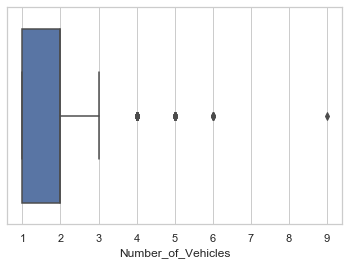

In [23]:

ax = sns.boxplot(x=data["Number_of_Vehicles"])

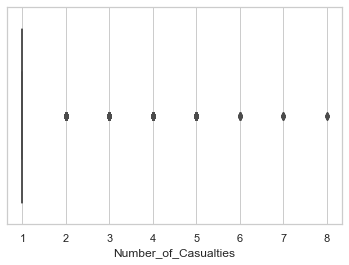

In [24]:
ax = sns.boxplot(x=data["Number_of_Casualties"])

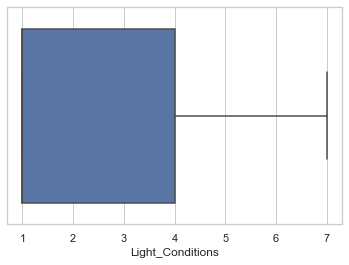

In [25]:
ax = sns.boxplot(x=data["Light_Conditions"])

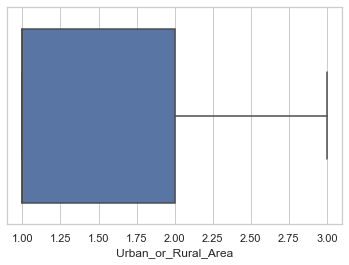

In [26]:
ax = sns.boxplot(x=data["Urban_or_Rural_Area"])

In [27]:
data = pd.get_dummies(data, columns=['Light_Conditions','Urban_or_Rural_Area'])
data.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Light_Conditions_1,Light_Conditions_4,Light_Conditions_5,Light_Conditions_6,Light_Conditions_7,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3
0,2.010000e+12,-1.084698,53.913137,3,1,1,0,0,0,1,0,0,1,0
1,2.010000e+12,-1.065564,53.924585,3,1,1,0,1,0,0,0,0,1,0
2,2.010000e+12,-1.008917,53.956579,2,2,1,0,1,0,0,0,0,1,0
3,2.010000e+12,-1.073960,53.964917,3,2,1,0,1,0,0,0,1,0,0
4,2.010000e+12,-1.097738,53.950897,2,2,2,1,0,0,0,0,1,0,0


In [28]:
X=data.loc[:, data.columns != any(['Accident_Severity'])]
y = data.iloc[:, 3].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [29]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_res = mm_scaler.fit_transform(X_train_res)
mm_scaler.transform(X_test)

array([[0.        , 0.5745843 , 0.5544874 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.5923169 , 0.91096531, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47200242, 0.19513835, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.17155783, 0.19905621, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.16612623, 0.1926473 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.40017811, 0.2039506 , ..., 0.        , 1.        ,
        0.        ]])

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)


0.8639386189258312

In [32]:
from sklearn.ensemble import AdaBoostClassifier
abc =AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini",max_depth=2),n_estimators=50,learning_rate=1)
model = abc.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
import collections
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8639386189258312


In [33]:
from sklearn.svm import SVC

In [34]:
sv=SVC(kernel='rbf',probability=True)
sv_classifier=sv.fit(X_train_res,y_train_res)
sv.score(X_test,y_test)

0.8639386189258312

In [35]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [36]:
accuracy_score(rfc_predict,y_test)

0.9989769820971867

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve,auc
y = label_binarize(y, classes=[1,2,3])
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)
n_classes = 3
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)



C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

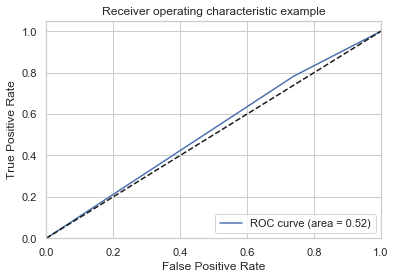

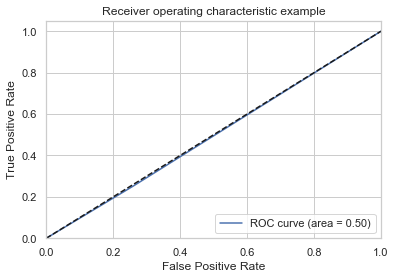

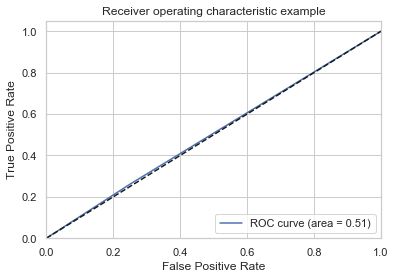

In [39]:
import matplotlib.pyplot as plt
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()